# Exercise Class Week 5
Tian You <br>
[tiayou@ethz.ch](mailto:tiayou@ethz.ch)<br>
20.10.2021 <br>

Note: If you'd like to run the workbook, please make sure that plotLP.py is also saved in the same directory.

In [1]:
# Import the module
import numpy as np

# Implement your function here
def pivot(T,i,k):
    # Create a copy of the tableau
    T_pivot = np.copy(T)
    
    # Step (i)
    # We divide the i-th row elementwise by the value of a_ik
    T_pivot[i,:] = T[i,:] / T[i,k]
    
    # Step (ii)
    # Note: for-loops can be interchanged
    # We iterate through each column (l = 1,...,n+m)
    for l in range(0,T.shape[1]):
        # In the column we iterate through each row, but skip row i (j=/=i,j=1,...,m)
        for j in range(0,T.shape[0]):
            if(j!=i):
                # We compute the new value
                T_pivot[j,l] = T[j,l] - T[j,k] * T[i,l] / T[i,k]
    
    return T_pivot  

In [2]:
# Adjust the printing format
np.set_printoptions(
    formatter={'str_kind': lambda x: '{:^7}'.format(x),
               'float': lambda x: '{: ^7.3g}'.format(x)})

## Part 1: Tableau Basics

Consider the following LP:
$$\begin{equation}
\begin{array}{llrrrrrrrr}
  &\text{max} \quad z= &x  &  &      &    &   \\
  &\text{s. t.:}    &x  &  &      & \leq  &4  \\
  &                 &   &  &y     & \leq  &4  \\
  &                 &x  &- &y     & \geq  &-2 \\
  &                 &x  &  &      & \geq  &0  \\
  &                 &   &  &y     & \geq  &0  \\
\end{array}
\end{equation}$$

Its feasible region has 5 vertices: $(0,0),(4,0),(4,4),(2,4),(0,2)$.

In [3]:
import pulp

Lp1 = pulp.LpProblem("My_LP_1", pulp.LpMaximize)

x = pulp.LpVariable('x', lowBound=0, cat=pulp.LpContinuous)
y = pulp.LpVariable('y', lowBound=0, cat=pulp.LpContinuous)

Lp1 += x

Lp1 += x <= 4
Lp1 += y <= 4
Lp1 += x - y >= -2

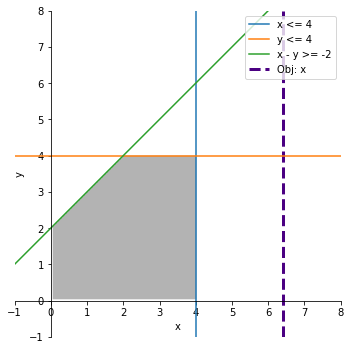

In [4]:
%matplotlib inline
from plotLP import *  
plotLP(Lp1, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)

Consider the following LP:
$$\begin{equation}
\begin{array}{llrrrrrrrr}
  &\text{max} \quad z= &x  &  &      &    &   \\
  &\text{s. t.:}    &x  &  &      & \leq  &4  \\
  &                 &   &  &y     & \leq  &4  \\
  &                 &x  &- &y     & \geq  &-2 \\
  &                 &x  &  &      & \geq  &0  \\
  &                 &   &  &y     & \geq  &0  \\
\end{array}
\end{equation}$$

#### Q: Assume $x\geq0, y\geq0$. Are the following two constraints equivalent?
1. $x-y\geq-2$
2. $x-y+s=-2, s\geq0$

<font color='#85929E'> No! Consider the solution $(x,y,s)=(0,8,6)$. It works for 2, but not 1. </font> 

#### Q: Assume $x\geq0, y\geq0$.  Are the following two constraints equivalent?
1. $x-y\geq-2$
2. $x-y+s=-2, s\leq0$

<font color='#85929E'> Yes. $x-y=-2-s\geq-2$ because $-s\geq 0$. However, we cannot use the second expression in the standard form, because the standard form requires $s\geq0$. Usually, one will rewrite 1 as $-x+y\leq2$ and then add the slack variable. </font> 


Can you rewrite the LP in the standard form?

The LP in the standard form is:
$$\begin{equation}
    \begin{array}{llrrrrrrrrrr}
        \\&\text{max} \quad  z = & x                            \\
          &\text{s.t:}     & x &   &   & + & s_1 &&&&& =    & 4 \\
          &                &   &   & y &&& + & s_2 &&& =    & 4 \\
          &                &-x & + & y &&&&& + & s_3 & =    & 2 \\
          &                & x &   &           &&&&&&& \geq & 0 \\
          &                &   &   & y         &&&&&&& \geq & 0 \\
          &                &   &   &      &&&&&& s_i & \geq & 0 & \forall i=1,2,3\\
    \end{array}
\end{equation}$$

Let's first ignore the objective function and only focus on the feasible region defined by the constraints.

Now, what is the corresponding tableau?

#### Q: The corresponding tableau (without the row for the objective function) has...
- <font color='#85929E'> 3 </font> rows
- <font color='#85929E'> 3 </font> slack variables
- <font color='#85929E'> 5 </font> columns
- <font color='#85929E'> 2 </font> free variables

#### Q: How many free variables are there for a tableau (without the row for the objective function) of size $5 \times 8$?
<font color='#85929E'> # of rows $= 5$; # of columns $= 8$. There are $8 - 5 = 3$ free variables. </font> 


The corresponding tableau is:
$$T_0=\begin{equation}
\begin{array}{rrrrr|r}
  s_1 & s_2 & s_3 & x & y & 1 \\ \hline
    1 &  0  &  0  & 1 & 0 & 4 \\
    0 &  1  &  0  & 0 & 1 & 4 \\
    0 &  0  &  1  &-1 & 1 & 2
\end{array}
\end{equation}$$

In [5]:
#Add a header
header1 = np.array(['s1','s2','s3','x','y','1']) 

#Intialize T0
T0 = np.matrix([
    [1, 0, 0,  1, 0, 4],
    [0, 1, 0,  0, 1, 4],
    [0, 0, 1, -1, 1, 2]
],dtype=float)

#Print the header and T0
print("", header1)
print(T0)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   0       0       1      -1       1       2   ]]


#### Q: Identify the following:
- Basis: <font color='#85929E'> columns corresponding to $s_1, s_2, s_3$. </font>
- Basic variables: <font color='#85929E'> $s_1, s_2, s_3$ </font>
- Non-basic variables: <font color='#85929E'> $x, y$ </font>
- Corresponding basic solution: $(s_1, s_2, s_3, x, y) = $  <font color='#85929E'> $(4,4,2,0,0)$ </font>

#### Q: Are there any other solutions to this system of 3 equations?
<font color='#85929E'> Yes, there is an infinite number of solutions to this system of equations. We can express the dependent variable in terms of independent variables:

$$\begin{equation}
    \begin{array}{ccl}
            &s_1 &= &4 - x \\
            &s_2 &= &4 - y \\
            &s_3 &= &2 + x - y \\
      \end{array}
\end{equation}
$$
</font>
<font color='#85929E'>
Every choice of $(x,y)$ determines the set of values for $(s_1, s_2, s_3, x, y)$. For example, choose $(x,y)=(1,1)$, then $(s_1, s_2, s_3, x, y) = (3, 3, 2, 1, 1)$ is a solution to the system of the equations. However, it is not a *basic* solution to the tableau. </font>

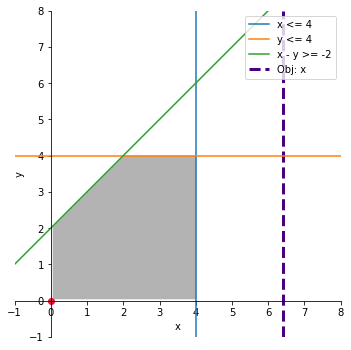

In [6]:
plotLP(Lp1, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T0, x_col_num=4, y_col_num=5)

## Part 2: Pivoting
Let's pivot at the entry $(3,4)$, or entry `(2,3)` in Python, of the original tableau:

$$T_0=\begin{equation}
\begin{array}{rrrrr|r}
  s_1 & s_2 & s_3 & x & y & 1 \\ \hline
    1 &  0  &  0  & 1 & 0 & 4 \\
    0 &  1  &  0  & 0 & 1 & 4 \\
    0 &  0  &  1  &\textbf{-1} & 1 & 2
\end{array}
\end{equation}$$

#### Q: Identify the following:
- What variable enters the basis? <font color='#85929E'> $x$ </font>
- What variable leaves the basis? <font color='#85929E'> $s_3$ </font>

In [7]:
T1 = pivot(T0,2,3)
print("", header1)
print(T1)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       1       0       1       6   ]
 [   0       1       0       0       1       4   ]
 [  -0      -0      -1       1      -1      -2   ]]


#### Q: Is this tableau feasible?
<font color='#85929E'> No, because there is a negative entry $-2$ on the RHS. This means that one of the variables $s_1, s_2, s_3, x, y$ will take a negative value, violating the non-negativity constraints and making the basic solution infeasible. </font>

#### Q: What is the corresponding basic solution?
$(s_1, s_2, s_3, x, y) = $  <font color='#85929E'> $(6,4,0,-2,0)$ </font>

### Part 3: Geometry
Recall the LP in the standard form:
$$\begin{equation}
    \begin{array}{llrrrrrrrrrr}
        \\&\text{max} \quad  z = & x                            \\
          &\text{s.t:}     & x &   &   & + & s_1 &&&&& =    & 4 \\
          &                &   &   & y &&& + & s_2 &&& =    & 4 \\
          &                &-x & + & y &&&&& + & s_3 & =    & 2 \\
          &                & x &   &           &&&&&&& \geq & 0 \\
          &                &   &   & y         &&&&&&& \geq & 0 \\
          &                &   &   &      &&&&&& s_i & \geq & 0 & \forall i=1,2,3\\
    \end{array}
\end{equation}$$

#### Q: In the basic solution of the last tableau, $s_3=0$. What information about $(x,y)$ does it provide us? 
<font color='#85929E'> It means $(x,y)$ lies on the line $-x+y=2$, because $-x+y=2$ when $s_3=0$. Mathematically, we call the constraint $-x+y\leq2$ is *tight* at $(-2,0)$ when $(-2,0)$ lies on the corresponding line. </font>

#### Q: In the basic solution of the last tableau, $s_3=0$ and  $y=0$. What information about $(x,y)$ do they provide us? 
<font color='#85929E'> $(x,y)$ is at the intersection of the line $-x+y=2$ and $y=0$. </font>

We can verify our answers by graphing it out. $(x,y)$ is indeed at the intersection of the two lines $-x+y=2$ and $y=0$.

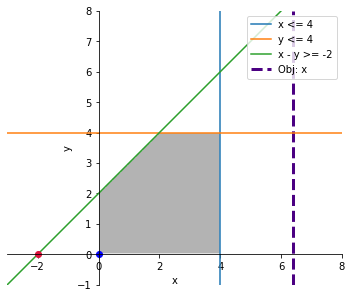

In [8]:
plotLP(Lp1, x_lower=-3, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T1, past_T=[T0], x_col_num=3, y_col_num=4)

#### Q: How can you produce the tableau corresponding to the point $(4,6)$ in the graph?

- <font color='#85929E'>$(4,6)$ is the intersection of $x=4$ and $-x+y=2$. 
- <font color='#85929E'>Both constraints $x\leq4$ and $-x+y\leq2$ are tight at $(4,6)$. Their corresponding slack variables must be 0, so $s_1=0$, $s_3=0$.
- <font color='#85929E'>$s_1, s_3$ must leave the basis. We need another two variables to enter the basis, which are $x$ and $y$ here.
- <font color='#85929E'>Then we can pivot on the corresponding entries to change the basis.


In [9]:
# Original tableau
print("", header1)
print(T0)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   0       0       1      -1       1       2   ]]


In [10]:
# Step 1: x enters the basis, s1 leaves the basis
T2 = pivot(T0,0,3)
print("", header1)
print(T2)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   1       0       1       0       1       6   ]]


In [11]:
# Step 2: y enters the basis, s3 leaves the basis
T3 = pivot(T2,2,4)
print("", header1)
print(T3)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [  -1       1      -1       0       0      -2   ]
 [   1       0       1       0       1       6   ]]


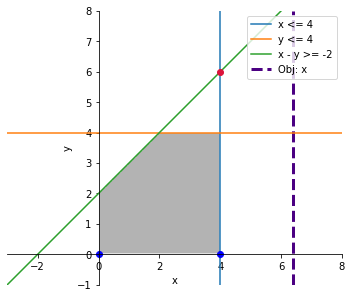

In [12]:
plotLP(Lp1, x_lower=-3, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T3, past_T=[T0, T2], x_col_num=3, y_col_num=4)

#### Q: Does the order of entering and leaving the basis matter?
<font color='#85929E'> It will only affect how we get there. The "final destination" won't change. </font>


In [13]:
# Original tableau
print("", header1)
print(T0)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   0       0       1      -1       1       2   ]]


In [14]:
# Step 1: x enters the basis, s3 leaves the basis
T4 = pivot(T0,2,3)
print("", header1)
print(T4)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       1       0       1       6   ]
 [   0       1       0       0       1       4   ]
 [  -0      -0      -1       1      -1      -2   ]]


In [15]:
# Step 2: y enters the basis, s1 leaves the basis
T5 = pivot(T4,0,4)
print("", header1)
print(T5)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       1       0       1       6   ]
 [  -1       1      -1       0       0      -2   ]
 [   1       0       0       1       0       4   ]]


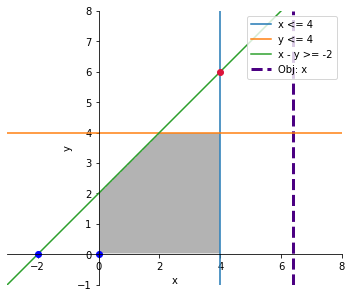

In [16]:
plotLP(Lp1, x_lower=-3, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T5, past_T=[T0, T4], x_col_num=3, y_col_num=4)

In the tableau above, the basic solution is $(s_1, s_2, s_3, x, y) = (0, -2, 0, 4, 0)$, where $s_2=-2<0$.

#### Q: What does it mean when a slack variable $s_i<0$?
<font color='#85929E'> It means the i-th constraint is violated. In the tableau above, $s_2=-2<0$. In the corresponding linear equation $y+s_2=4$. If $s_2<0$, $y=4-s_2>4$ , violating the constraint. </font>


### Part 4: Pivoting Rules
We want to determine a sequence of *feasible* tableaus. Here are the rules that we can follow:
- Choose the column $j$ s.t. $\exists i\in \{1,\dots,m\}$ with $a_{i,j}>0$.
- Choose the row $i$ according to the quotient rule / ratio test, where $\frac{b_i}{a_{i,j}}$ is the smallest among $a_{i,j}>0, i\in \{1,\dots,m\}$.

In [17]:
# Original tableau
print("", header1)
print(T0)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   0       0       1      -1       1       2   ]]


#### Q: Which column can be a pivot column for the above tableau if we want to stay in the feasible region?
<font color='#85929E'> Both $x$ and $y$ are ok. </font>

#### Q: For column $y$, which pivot row should we choose according to the quotient rule?
<font color='#85929E'> The last row, because $2/1 < 4/1$. The code below demonstrates why we should pick the smaller ratio.</font>

In [18]:
# Pivot on column y, last row: all entries in the last column b >= 0, tableau feasible.
T6 = pivot(T0,2,4)
print("", header1)
print(T6)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1      -1       1       0       2   ]
 [   0       0       1      -1       1       2   ]]


In [19]:
# Pivot on column y, second last row: last entry in the column b < 0, tableau infeasible.
T7 = pivot(T0,1,4)
print("", header1)
print(T7)

 [  s1      s2      s3       x       y       1   ]
[[   1       0       0       1       0       4   ]
 [   0       1       0       0       1       4   ]
 [   0      -1       1      -1       0      -2   ]]


### Part 5: Objective Function
Let's now bring in the objective row: $z=x$, or $z-x=0$.

$$\begin{equation}
\begin{array}{r|rrrrr|r}
  z & s_1 & s_2 & s_3 & x & y & 1 \\ \hline
  1 &  0  &  0  &  0  &-1 & -5 & 0 \\ \hline
  0 &  1  &  0  &  0  & 1 & 0 & 4 \\
  0 &  0  &  1  &  0  & 0 & 1 & 4 \\
  0 &  0  &  0  &  1  &-1 & 1 & 2
\end{array}
\end{equation}$$

In [20]:
T0_obj = np.matrix([
    [1, 0, 0, 0, -1, 0, 0],
    [0, 1, 0, 0,  1, 0, 4],
    [0, 0, 1, 0,  0, 1, 4],
    [0, 0, 0, 1, -1, 1, 2]
],dtype=float)

header1_obj = np.array(['z','s1','s2','s3','x','y','1']) 

print("", header1_obj)
print(T0_obj)

 [   z      s1      s2      s3       x       y       1   ]
[[   1       0       0       0      -1       0       0   ]
 [   0       1       0       0       1       0       4   ]
 [   0       0       1       0       0       1       4   ]
 [   0       0       0       1      -1       1       2   ]]


#### Q: How to choose the pivot column to achieve the largest *marginal* increase?
<font color='#85929E'> Choose the most negative element in the first row. </font>

#### Q: Will such a choice guarantee the largest increase in the objective value?
<font color='#85929E'> Not necessarily. The total amount of increase depends on both the number in the objective row and the value of the variable (from the basic solution of the tableau after the pivoting step). </font>

In [21]:
T1_obj = pivot(T0_obj,1,4)
print("", header1_obj)
print(T1_obj)

 [   z      s1      s2      s3       x       y       1   ]
[[   1       1       0       0       0       0       4   ]
 [   0       1       0       0       1       0       4   ]
 [   0       0       1       0       0       1       4   ]
 [   0       1       0       1       0       1       6   ]]


#### Q: Is this tableau optimal?
<font color='#85929E'> Yes, because all entries in the first row are non-negative. Here, we have $z+s_1=4$, or $z=4-s_1$. If $s_1\geq 0$ take any other values other than $0$, the value of $z$ will decrease. </font>

#### Q: What is the corresponding basic solution and the value of the objective?
$(s_1, s_2, s_3, x, y) = $  <font color='#85929E'> $(0,4,6,4,0)$ with $z=4$. </font>

#### Q: Is this the only optimal solution to the LP?
 <font color='#85929E'> Not necessarily. Let's try another pivot step below. </font>

In [22]:
T2_obj = pivot(T1_obj,2,5)
print("", header1_obj)
print(T2_obj)

 [   z      s1      s2      s3       x       y       1   ]
[[   1       1       0       0       0       0       4   ]
 [   0       1       0       0       1       0       4   ]
 [   0       0       1       0       0       1       4   ]
 [   0       1      -1       1       0       0       2   ]]


#### Q: Is this tableau optimal?
<font color='#85929E'> Yes, because all entries in the first row are non-negative. </font>

#### Q: How do we interpret the results?
<font color='#85929E'>  The basic solutions of these two tableaus correpond to the points $(4,0)$ and $(4,4)$ on the x-y plane. Both are optimnal, so any points on the line segement between $(4,0)$ and $(4,4)$ are optimal. </font>

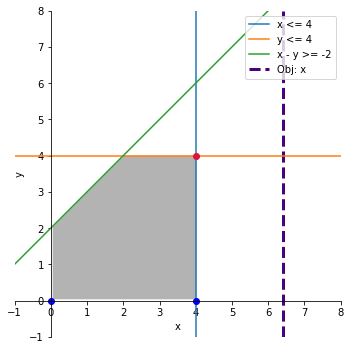

In [23]:
plotLP(Lp1, x_lower=-1, x_upper=8, y_lower=-1, y_upper=8)
plotVert(T2_obj, past_T=[T0_obj, T1_obj], x_col_num=4, y_col_num=5)

In [24]:
Lp1.solve()
print("Solution obtained with pulp:")
#Print out the optimal objective value of my_lp
print("Objective: " + str(Lp1.objective.value()))
#Print out optimal vertex.
for v in Lp1.variables():
    print(str(v) + " = " + str(v.value()))
# PuLP only gives you one point on the line segement.

Solution obtained with pulp:
Objective: 4.0
x = 4.0
y = 0.0


### Part 6: Unbounded Tableau

Let's remove the first constraint $x\leq4$ in the original LP:
$$\begin{equation}
\begin{array}{llrrrrrrrr}
  &\text{max} \quad z= &x  &  &      &    &   \\
  &\text{s. t.:}    &   &  &y     & \leq  &4  \\
  &                 &x  &- &y     & \geq  &-2 \\
  &                 &x  &  &      & \geq  &0  \\
  &                 &   &  &y     & \geq  &0  \\
\end{array}
\end{equation}$$

This LP becomes unbounded, as shown in the graph below:

-2

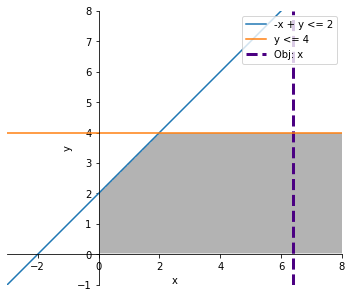

In [25]:
Lp2 = pulp.LpProblem("My_LP", pulp.LpMaximize)

x = pulp.LpVariable('x', lowBound=0, cat=pulp.LpContinuous)
y = pulp.LpVariable('y', lowBound=0, cat=pulp.LpContinuous)

Lp2 += x

Lp2 += -x + y <= 2
Lp2 += y <= 4

plotLP(Lp2, x_lower=-3, x_upper=8, y_lower=-1, y_upper=8)

Lp2.solve()

The corresponding tableau with the objective function is as follows:

In [26]:
U0 = np.matrix([
    [1, 0, 0, -1, 0, 0],
    [0, 1, 0,  0, 1, 4],
    [0, 0, 1, -1, 1, 2]
],dtype=float)

header2 = np.array(['z','s1','s2','x','y','1']) 

print("", header2)
print(U0)

 [   z      s1      s2       x       y       1   ]
[[   1       0       0      -1       0       0   ]
 [   0       1       0       0       1       4   ]
 [   0       0       1      -1       1       2   ]]


#### Q: Can we carry out a ratio test with $x$ as the entering variable?
<font color='#85929E'> No, because there are no positive entries in column $x$. We should stop here. </font>

#### Q: How can we tell that the LP is unbounded from the tableau?
<font color='#85929E'> Because in the first row $a_{0,x} = -1 < 0$, and every other entry in column $x$ are $\leq 0$. </font>

#### Q: Why is that?
<font color='#85929E'> We can express the dependent variables as a function of the independent variables: $s_1 = 4 - y$, and $s_2 = 2 + x - y$. The objective function is $z = x$.

If we set $y=0, x=\delta$, then we have $s_1 = 4$ and $s_2 = 2 + \delta$. The solution $(s_1, s_2, x, y) = (4, 2 + \delta, \delta, 0)$ is always feasible for any non-negative $\delta$.

This solution has a corresponding objective-function value of $z = x = \delta$. We can always increase $\delta$ further, so this problem is unbounded. </font>

#### Q: Can we try pivoting on this tableau (even though we shuold stop according to the algorithm)?
<font color='#85929E'> We can of course try pivoting on this tableau, but we will probably get "stuck" again soon, as demonstrated below. </font>

In [27]:
# y enters the basis, s2 leaves
U1 = pivot(U0,2,4)
print("", header2)
print(U1)

 [   z      s1      s2       x       y       1   ]
[[   1       0       0      -1       0       0   ]
 [   0       1      -1       1       0       2   ]
 [   0       0       1      -1       1       2   ]]


In [28]:
# x enters the basis, s1 leaves
U2 = pivot(U1,1,3)
print("", header2)
print(U2)

 [   z      s1      s2       x       y       1   ]
[[   1       1      -1       0       0       2   ]
 [   0       1      -1       1       0       2   ]
 [   0       1       0       0       1       4   ]]


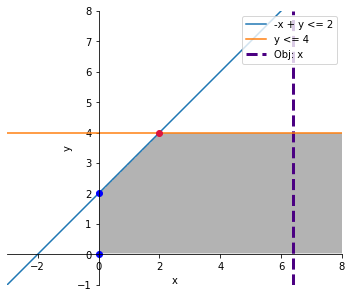

In [29]:
plotLP(Lp2, x_lower=-3, x_upper=8, y_lower=-1, y_upper=8)
plotVert(U2, past_T=[U0, U1], x_col_num=3, y_col_num=4)

## Part 7: Summary

### How to read tableaus?
- Tableau feasible: no negative entries in the last column $b$ $\Leftrightarrow$ Basic solution feasible for the LP
- Tableau infeasible: one or more entries in column $b$ is negative $\Leftrightarrow$ Basic solution infeasible for the LP
- Tableau optimal: the objective row has no negative entries $\Leftrightarrow$ Basic solution optimal for the LP
- Tableau unbounded: there exists one column $j$ where the entry in the objective row $a_{0,j}<0$ AND all other entries in this column are non-positive, i.e.  $a_{i,j}\leq0 \quad \forall i={1,2,\dots,m}$. 

Tableau and its basic solution has a 1-to-1 relationship (except in the unbounded case - "unbounded basic solution" is not a term.)

### Tableaus and LPs
Feasibility: <br>
- Tableau infeasible $\Leftarrow$ LP infeasible
- Tableau feasible $\Rightarrow$ LP feasible
- Tableau infeasible $\nRightarrow$ LP infeasible: The basic solution represents **one point** on the hyperplane. A point being infeasible means it is outside the feasible region of the LP, and it does not necessarily imply that the feasible region of the LP is empty.

Optimality: <br>
- Tableau optimal $\Leftrightarrow$ LP optimal: When a tableau is optimal, it means its corresponding basic solution maximizes the objective value, hence the LP is also optimal. There might be more than optimal tableaus for the same LP.

Unbounded: <br>
- Tableau unbounded $\Rightarrow$ LP unbounded
- Tableau unbounded $\nLeftarrow$ LP unbounded: see our example above.

### What about feasibility for LP?
- LP feasible $\Leftrightarrow$ Feasible region not empty
- LP infeasible $\Leftrightarrow$ Feasible region empty
- LP unbounded $\Rightarrow$ Feasible region unbounded
- LP unbounded $\nLeftarrow$ Feasible region unbounded. An LP may have an optimal solution even though its feasible region is unbounded. In the example above, if we are maximizing $-x$, or minimizing $x$, then the LP is not unbounded and would have an optimal solution.